# Shubhankar Tiwari

Tried to build a python tool for https://www.reddit.com/r/dataisbeautiful/comments/7ol3gy/gaussian_distribution_oc/
However it is too much CPU intensive to develop many frames for the pixel movement animation. Also PIL is not too intiuitive to figure out

#### RGB to HSL conversion

In [9]:
import colorsys

# "gold"
r, g, b = 1.00, 0.84, 0.00

print ("RGB", (r, g, b))

y, i, q = colorsys.rgb_to_yiq(r, g, b)
print ("YIQ", (y, i, q), "=>", colorsys.yiq_to_rgb(y, i, q))

h, l, s = colorsys.rgb_to_hls(r, g, b)
print ("HLS", (h, l, s), "=>", colorsys.hls_to_rgb(h, l, s))

h, s, v = colorsys.rgb_to_hsv(r, g, b)
print ("HSV", (h, s, v), "=>", colorsys.hsv_to_rgb(h, s, v))

RGB (1.0, 0.84, 0.0)
YIQ (0.7955999999999999, 0.36606800000000006, -0.22808399999999987) => (1.0, 0.8399999999999999, 5.551115123125783e-17)
HLS (0.13999999999999999, 0.5, 1.0) => (1.0, 0.8399999999999999, 0.0)
HSV (0.13999999999999999, 1.0, 1.0) => (1.0, 0.8399999999999999, 0.0)


#### Import libraries and load image

In [105]:
from PIL import Image,ImageDraw
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
im = Image.open("gauss.jpg")

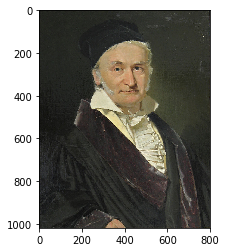

In [106]:
#im.show()
imshow(np.asarray(im))
plt.show()

#### Create tuples of r g b values for each pixel

In [107]:
r, g, b = im.split()
r = np.array(r).flatten()
g = np.array(g).flatten()
b = np.array(b).flatten()

colors=[]
for i,j,k in zip(r,g,b):
    tup=i,j,k
    colors.append(tup)

print(colors[0])

(30, 31, 26)


#### Function to convert RGB value to HSL 
(vectorization does not lead to performance improvement)

In [108]:
def rgb2hls(x):
    to_float = lambda x : x / 255.0
    (r, g, b) = map(to_float, x)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return l

#### Create list of luminosity values

In [109]:
lum=[]
for i in colors:
   lum.append(rgb2hls(i))

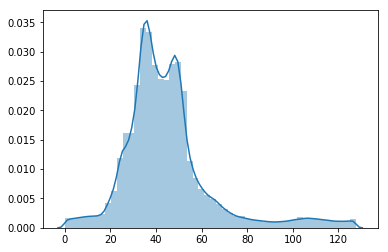

In [23]:
#sns.distplot(lum)

#### Count of each luminosity level (normalized)

In [110]:
from collections import Counter
lumd = dict(Counter(lum)) #group by count

#normalize
factor=1.0/sum(lumd.values())
for k in lumd:
  lumd[k] = lumd[k]*factor

#### Dataframe for seaborn distribution of luminosity levels

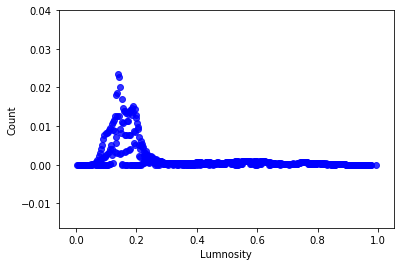

In [111]:
lumdf = pd.DataFrame(list(lumd.items()),columns=['Lumnosity', 'Count']) #python 2.x does not require the list argument

sns.regplot(x='Lumnosity',y='Count',data=lumdf,fit_reg=False,color='b')
#list(lumd.values())

#### Code to plot by HSL values

In [ ]:
color = 'hsl(%d, %d%%, %d%%)' % (hue, saturation, luminance)
draw.point((x, y), fill=color)

#### Set canvas size and x,y cordinates for moving through each pixel 

In [112]:
#https://stackoverflow.com/questions/6208980/sorting-a-list-of-rgb-triplets-into-a-spectrum
width,height = 500,500

img = Image.new("RGBA", (width,height))
canvas = ImageDraw.Draw(img)

dx = width / float(len(r)) 
x = 0
y = height / 2.0

### CPU intensive

#### Sort rgb colors by luminosity levels

In [113]:
rainbow = sorted(colors, key=rgb2hls)

#### Build list of luminosty values for each sorted pixel color

In [114]:
l=[]
for rgb in rainbow:
    l.append(rgb2hls(rgb))

#### Plot: x = fixed distance for each pixel, y = count of luminosity level

In [119]:
for i,rgb in enumerate(rainbow):
    lu = l[i]
    canvas.line((x, 0, x + dx, lumd[lu]*(10**6)), width=10, fill=rgb) #width is line thickness
    x += dx
img.save('temp.png')
#img.show()

In [81]:
int(max(lumd.values())/100)

3

In [116]:
print(max(lumd.values()),min(lumd.values()))

0.023613837095191364 1.226692836113837e-06
